In [1]:
import pandas as pd
import numpy as np


In [2]:
movies_metadata = pd.read_csv('1M_transcriptions_updated.csv')
ratings = pd.read_csv(r'filtered_ratings.csv')

In [3]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5.0,2000-12-31 22:12:40
1,1,661,3.0,2000-12-31 22:35:09
2,1,914,3.0,2000-12-31 22:32:48
3,1,3408,4.0,2000-12-31 22:04:35
4,1,2355,5.0,2001-01-06 23:38:11
...,...,...,...,...
997294,6040,1091,1.0,2000-04-26 02:35:41
997295,6040,1094,5.0,2000-04-25 23:21:27
997296,6040,562,5.0,2000-04-25 23:19:06
997297,6040,1096,4.0,2000-04-26 02:20:48


In [4]:
ratings.rename(columns={'Rating': 'rating'}, inplace=True)
ratings.rename(columns={'UserID': 'userId'}, inplace=True)
ratings.rename(columns={'MovieID': 'movieId'}, inplace=True)

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997299 entries, 0 to 997298
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     997299 non-null  int64  
 1   movieId    997299 non-null  int64  
 2   rating     997299 non-null  float64
 3   Timestamp  997299 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 30.4+ MB


In [6]:
ratings['rating'] = ratings['rating'].apply(lambda x: 1 if x > 3.5 else 0)


In [7]:
ratings

,userId,movieId,rating,Timestamp
0,1,1193,1,2000-12-31 22:12:40
1,1,661,0,2000-12-31 22:35:09
2,1,914,0,2000-12-31 22:32:48
3,1,3408,1,2000-12-31 22:04:35
4,1,2355,1,2001-01-06 23:38:11
...,...,...,...,...
997294,6040,1091,0,2000-04-26 02:35:41
997295,6040,1094,1,2000-04-25 23:21:27
997296,6040,562,1,2000-04-25 23:19:06
997297,6040,1096,1,2000-04-26 02:20:48


In [8]:
unique_movieId_list = list(ratings['movieId'].unique())
len(unique_movieId_list)

3626

In [9]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2419 entries, 0 to 2418
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   youtubeId      2419 non-null   object
 1   movieId        2419 non-null   int64 
 2   title          2419 non-null   object
 3   transcription  2410 non-null   object
dtypes: int64(1), object(3)
memory usage: 75.7+ KB


In [10]:
movies_metadata = movies_metadata[movies_metadata['movieId'].isin(unique_movieId_list)]
movies_metadata.reset_index(drop=True, inplace=True)
movies_metadata

,youtubeId,movieId,title,transcription
0,K26_sDKnvMU,1,Toy Story (1995),"Sergeant? Yes, sir. Establish a recon post do..."
1,3LPANjHlPxo,2,Jumanji (1995),I'm glad you decided to buy this place. I'm s...
2,rEnOoWs3FuA,3,Grumpier Old Men (1995),Moron! Puts! Crankier. If my dog was as ugly ...
3,j9xml1CxgXI,4,Waiting to Exhale (1995),"Savannah, Bernadine, Robin, Gloria. Four frie..."
4,2GfZl4kuVNI,6,Heat (1995),He's here. I can feel it. You search for the ...
...,...,...,...,...
2414,I18TOdCvvdM,3948,Meet the Parents (2000),Pam is the one Greg wants to marry. Just rela...
2415,lgo3Hb5vWLE,3949,Requiem for a Dream (2000),You Purple in the morning blue in the afterno...
2416,LABt1rwmIgg,3950,Tigerland (2000),Welcome to Tigerland! This will be your final...
2417,n4bBafN_s6I,3951,Two Family House (2000),"Ladies and gentlemen, Buddy Visallo. He wants..."


In [11]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2419 entries, 0 to 2418
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   youtubeId      2419 non-null   object
 1   movieId        2419 non-null   int64 
 2   title          2419 non-null   object
 3   transcription  2410 non-null   object
dtypes: int64(1), object(3)
memory usage: 75.7+ KB


In [12]:
movies_metadata = movies_metadata.dropna(subset=['transcription'])
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2410 entries, 0 to 2418
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   youtubeId      2410 non-null   object
 1   movieId        2410 non-null   int64 
 2   title          2410 non-null   object
 3   transcription  2410 non-null   object
dtypes: int64(1), object(3)
memory usage: 94.1+ KB


In [13]:
unique_movieId_list_movies_metadata = list(movies_metadata['movieId'].unique())
len(unique_movieId_list_movies_metadata)

2410

In [14]:
ratings = ratings[ratings['movieId'].isin(unique_movieId_list_movies_metadata)]
ratings.reset_index(drop=True, inplace=True)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733422 entries, 0 to 733421
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     733422 non-null  int64 
 1   movieId    733422 non-null  int64 
 2   rating     733422 non-null  int64 
 3   Timestamp  733422 non-null  object
dtypes: int64(3), object(1)
memory usage: 22.4+ MB


In [15]:
movies_metadata = movies_metadata.rename(columns={'transcription': 'tags'})

In [16]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2410 entries, 0 to 2418
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   youtubeId  2410 non-null   object
 1   movieId    2410 non-null   int64 
 2   title      2410 non-null   object
 3   tags       2410 non-null   object
dtypes: int64(1), object(3)
memory usage: 94.1+ KB


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(movies_metadata['tags'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
indices = pd.Series(movies_metadata.index, index=movies_metadata['movieId']).drop_duplicates()
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies_metadata['movieId'].iloc[movie_indices]

In [18]:
ratings

,userId,movieId,rating,Timestamp
0,1,661,0,2000-12-31 22:35:09
1,1,914,0,2000-12-31 22:32:48
2,1,3408,1,2000-12-31 22:04:35
3,1,2355,1,2001-01-06 23:38:11
4,1,1197,0,2000-12-31 22:37:48
...,...,...,...,...
733417,6040,1090,0,2000-04-26 02:18:38
733418,6040,1091,0,2000-04-26 02:35:41
733419,6040,1094,1,2000-04-25 23:21:27
733420,6040,562,1,2000-04-25 23:19:06


In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733422 entries, 0 to 733421
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     733422 non-null  int64 
 1   movieId    733422 non-null  int64 
 2   rating     733422 non-null  int64 
 3   Timestamp  733422 non-null  object
dtypes: int64(3), object(1)
memory usage: 22.4+ MB


### BERT try  (skiping code of tfidf)

In [20]:
timepass =movies_metadata.loc[20:21]
timepass

,youtubeId,movieId,title,tags
20,mQf3Ngg2cks,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,《復雲散》復雲散 明月照人來團圓美滿 今朝醉琴前池塘 遠揚溪水紅衫隨意 鬢鬢連開雙雙對對人來...
21,gA-5nLQCmW8,31,Dangerous Minds (1995),The Kids with High IQs Who are those kids? Re...


In [21]:
from tqdm import tqdm

import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

/home/patel8m6/Desktop/python scripts/mldl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
# Load pre-trained multilingual BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
model = BertModel.from_pretrained('bert-base-multilingual-uncased')

In [23]:
def get_bert_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Compute BERT embeddings for each movie's tags with progress bar
bert_embeddings = []
for tag in tqdm(movies_metadata['tags'], desc="Computing BERT embeddings"):
    bert_embeddings.append(get_bert_embedding(tag, tokenizer, model))

movies_metadata['bert_embedding'] = bert_embeddings

Computing BERT embeddings: 100%|████████████| 2410/2410 [03:36<00:00, 11.12it/s]


In [24]:
# Compute cosine similarity between BERT embeddings
movie_embeddings = np.stack(movies_metadata['bert_embedding'].values)
cosine_sim = cosine_similarity(movie_embeddings, movie_embeddings)

In [25]:
# Create a reverse mapping of indices and movieId
indices = pd.Series(movies_metadata.index, index=movies_metadata['movieId']).drop_duplicates()

def get_recommendations(movieId, cosine_sim=cosine_sim):
    if movieId not in indices:
        return []
    idx = indices[movieId]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies_metadata['movieId'].iloc[movie_indices]

# Step 2: Integrate User Ratings
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')

# Function to get k-nearest neighbors based on item-item similarity
def get_k_nearest_neighbors(item_similarity_df, movie_id, k=10):
    if movie_id not in item_similarity_df.columns:
        return pd.Index([])
    sim_scores = item_similarity_df[movie_id]
    nearest_neighbors = sim_scores.sort_values(ascending=False).index[1:k+1]
    return nearest_neighbors

# Function to predict rating for a specific user and movie
def predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=10):
    nearest_neighbors = get_k_nearest_neighbors(item_similarity_df, movie_id, k)
    if nearest_neighbors.empty:
        return 0
    neighbor_ratings = user_item_matrix.loc[user_id, nearest_neighbors]
    if neighbor_ratings.isna().all():
        return 0
    return Counter(neighbor_ratings.dropna()).most_common(1)[0][0]

# Compute the item similarity DataFrame using BERT embeddings
item_similarity_df = pd.DataFrame(cosine_sim, index=movies_metadata['movieId'], columns=movies_metadata['movieId'])

# Split the ratings data into training and testing sets
train_ratings = ratings.sample(frac=0.8, random_state=42)
test_ratings = ratings.drop(train_ratings.index)

In [30]:


# Evaluate at K=255
K = 255
y_true_all = []
y_pred_all = []

for index, row in test_ratings.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    y_true_all.append(row['rating'])
    y_pred_all.append(predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=K))

# Convert to integers
y_true_all = [int(val) for val in y_true_all]
y_pred_all = [int(val) for val in y_pred_all]

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true_all, y_pred_all))

print("Confusion Matrix:")
print(confusion_matrix(y_true_all, y_pred_all))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.49      0.54     61724
           1       0.67      0.76      0.72     84960

    accuracy                           0.65    146684
   macro avg       0.64      0.63      0.63    146684
weighted avg       0.64      0.65      0.64    146684

Confusion Matrix:
[[30336 31388]
 [20131 64829]]


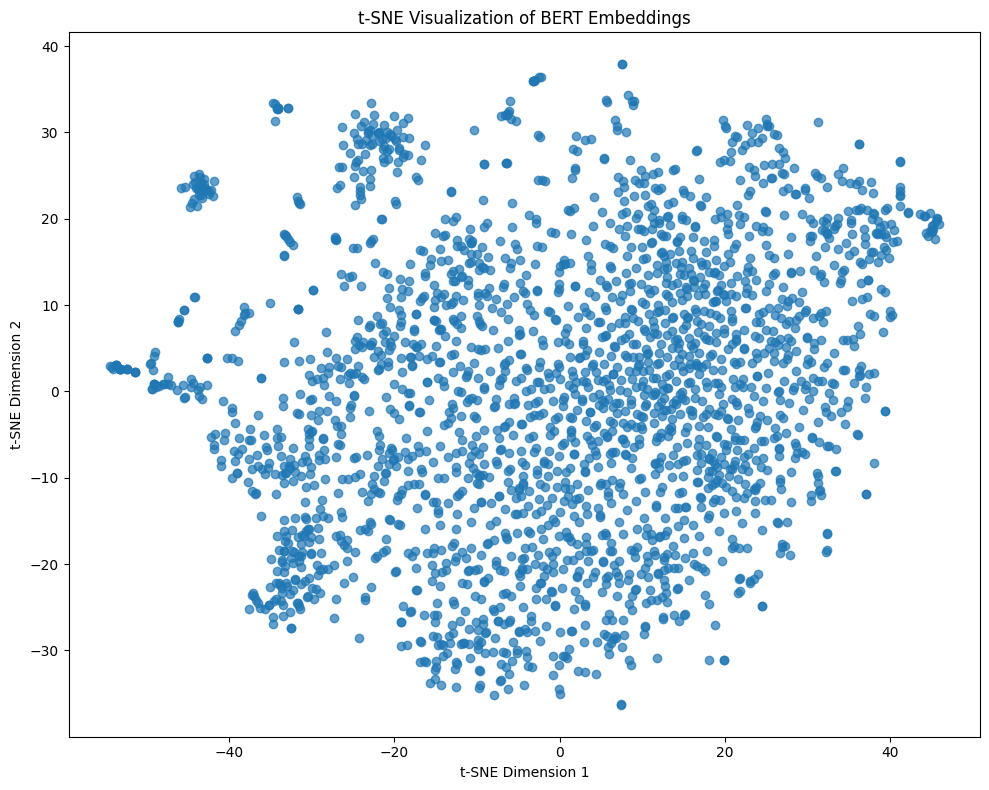

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE on the BERT embeddings
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(movie_embeddings)

# Create a scatter plot of the t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], alpha=0.7)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of BERT Embeddings')
plt.tight_layout()
plt.savefig('embessings BERT multilangguage whisper.png')
plt.show()

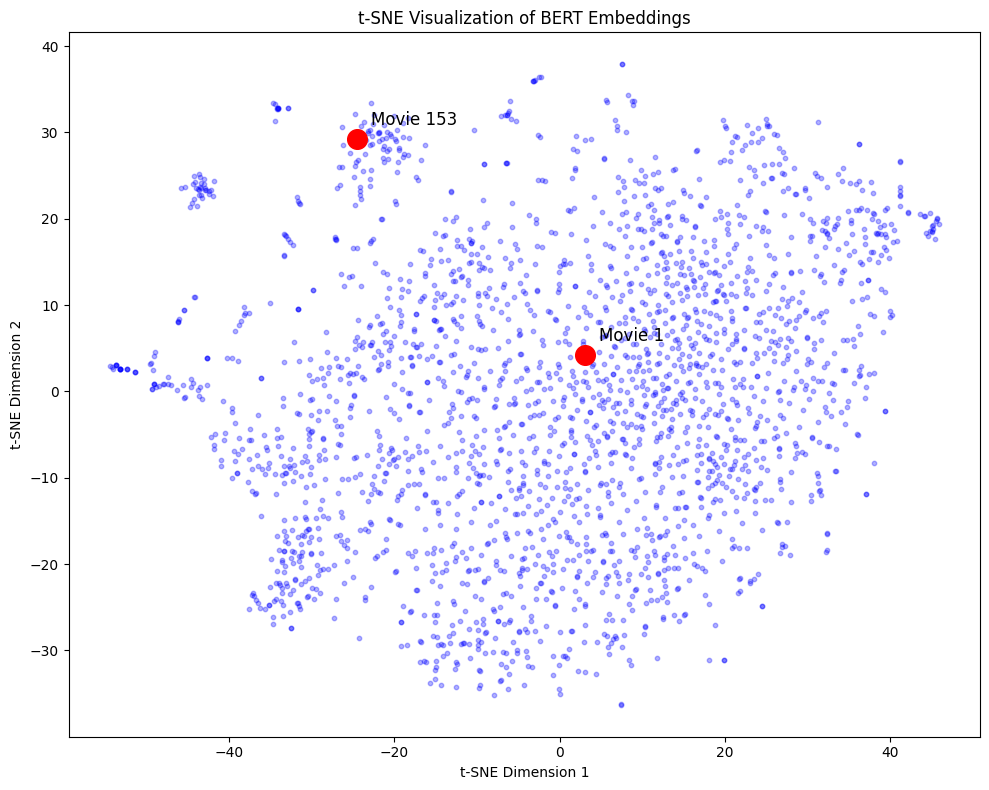

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE on the BERT embeddings
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(movie_embeddings)

# Create a scatter plot of the t-SNE embeddings
plt.figure(figsize=(10, 8))

# Plot the remaining movies in blue with reduced opacity
normal_mask = ~movies_metadata['movieId'].isin([1, 3114])
plt.scatter(tsne_embeddings[normal_mask, 0], tsne_embeddings[normal_mask, 1], alpha=0.3, color='blue', label='Other Movies', s=10)

# Plot movies with movieId listed in red with larger size
highlighted_movies = [1, 153]
for movie_id in highlighted_movies:
    movie_mask = movies_metadata['movieId'] == movie_id
    if movie_mask.any():
        plt.scatter(tsne_embeddings[movie_mask, 0], tsne_embeddings[movie_mask, 1], alpha=1.0, color='red', s=200)
        
        # Add annotation for each highlighted movie
        x = tsne_embeddings[movie_mask, 0][0]
        y = tsne_embeddings[movie_mask, 1][0]
        plt.annotate(f'Movie {movie_id}', (x, y), textcoords='offset points', xytext=(10, 10), ha='left', fontsize=12)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of BERT Embeddings')
plt.tight_layout()
plt.savefig('embeddings_BERT_multilanguage_whisper_highlighted 1, 78499, 8844.png')
plt.show()

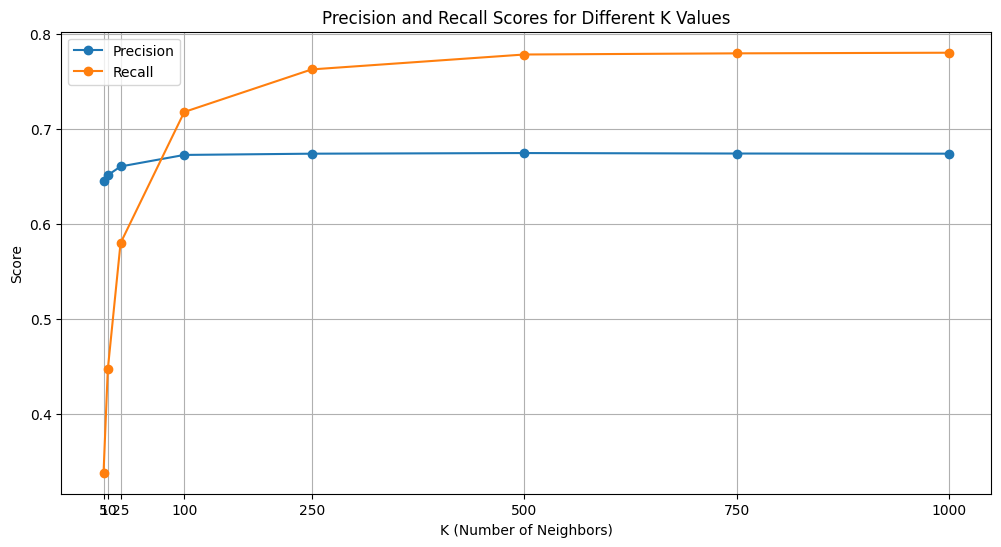

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score


# Define the list of K values
K_values = [5, 10, 25, 100, 250, 500, 750, 1000]

# Initialize lists to store precision and recall values for each K
precision_scores = []
recall_scores = []

for K in K_values:
    # Perform prediction and evaluation
    y_true_all = []
    y_pred_all = []

    for index, row in test_ratings.iterrows():
        user_id = row['userId']
        movie_id = row['movieId']
        y_true_all.append(row['rating'])
        y_pred_all.append(predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=K))

    # Convert to integers
    y_true_all = [int(val) for val in y_true_all]
    y_pred_all = [int(val) for val in y_pred_all]

    # Calculate precision and recall
    precision = precision_score(y_true_all, y_pred_all)
    recall = recall_score(y_true_all, y_pred_all)

    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)

# Plot the precision and recall scores for different values of K
plt.figure(figsize=(12, 6))
plt.plot(K_values, precision_scores, label='Precision', marker='o')
plt.plot(K_values, recall_scores, label='Recall', marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Score')
plt.title('Precision and Recall Scores for Different K Values')
plt.xticks(K_values)
plt.legend()
plt.grid(True)
plt.show()
